# Access to Electricity: SDG 7

The Sustainable Development Goals (SDGs) are a UN initiative consisting of 17 goals.  Their aim is to continue striving towards development in a more environmentally conscious manner.  

In this notebook, we will investigate data regarding the aim of increasing access to electricity.  We will create three main graphs – first looking at data on a global scale, then focusing on Africa, and finally looking at if progress has been made in the 10 countries with the lowest access.  

We will be using World Bank data spanning from 2000-2019 relating to Goal 7 (Affordable and Clean Energy).

First, import the necessary packages:

In [1]:
!pip install seaborn
!pip install pycountry

import matplotlib.pyplot as plt
import pandas as pd
import pycountry 
import seaborn as sns

Then, run the code below to import the dataset `GoalData7.csv` (find the file on the session 2 page) to access the data and extract the variables that are of relevance.  This will create a data frame called `sdg` that contains our 6 variables of interest:
* `GeoAreaCode`
* `GeoAreaName`
* `TimePeriod`
* `Value`
* `Location`
* `Nature`



In [2]:
raw_sdg = pd.read_csv("Goal7data.csv")
sdg = raw_sdg[["GeoAreaCode", "GeoAreaName", "TimePeriod", "Value", "Location", "Nature"]].copy()

Have a look at the data frame `sdg`, calling up random samples. Notice how the data is split up into `ALLAREA`, `RURAL` and `URBAN` data points, along with values for countries and wider regions.  

In [3]:
sdg
sdg.sample(20)

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
9092,515,Developing regions,2019,96,URBAN,E
6180,340,Honduras,2015,90,ALLAREA,C
5257,266,Gabon,2005,82,ALLAREA,C
10642,620,Portugal,2000,100,URBAN,E
10888,634,Qatar,2010,100,URBAN,E
10832,630,Puerto Rico,2011,100,ALLAREA,E
12007,706,Somalia,2010,21,ALLAREA,M
1403,40,Austria,2005,100,RURAL,E
3817,178,Congo,2007,36,ALLAREA,M
10196,585,Palau,2011,96,RURAL,E


## A Global Look

In this first section, we will look at the data on a global scale.  Run the code below to create the data frame `df_world` that consists of the `ALLAREA` data from the geographical area called `World`.

In [4]:
df_world = sdg[(sdg["GeoAreaName"] == "World") & (sdg["Location"] == "ALLAREA")]

Then, create a line plot from this data frame, with the x-axis being the `TimePeriod`, and the y-axis being the access to electricity  `Value`.  Specify a colour, and add the parameter `label = "All Country Data"` to the plot specifications in order to help clarify the legend.

Format the figure, reffering to the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for help.  Ensure that the:
* x axis ticks are correctly spaced [hint: use splicing], and rotated so they can be read 
* both axes are labelled
* there is a grid (and it is behind the line plot)
* the plot has a title
* the plot has a legend
* colour documentation = https://matplotlib.org/stable/gallery/color/named_colors.html

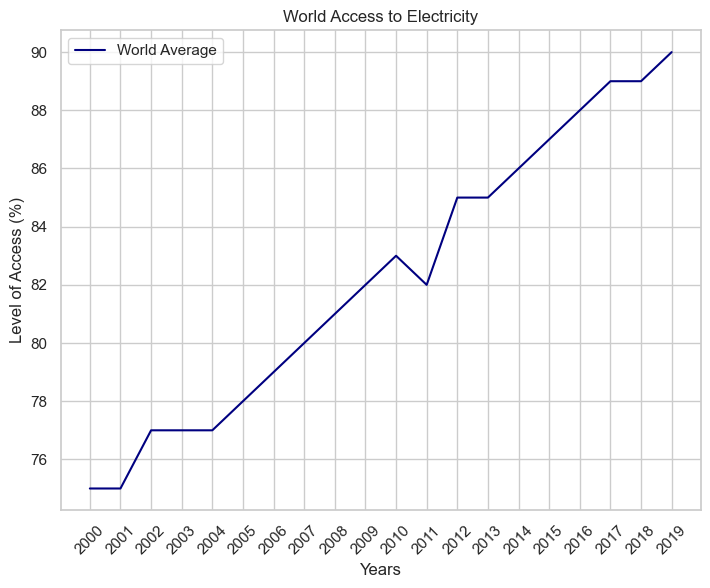

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(df_world.TimePeriod, df_world.Value, c="navy", label = "World Average")

plt.xticks(df_world.TimePeriod[::1], rotation=45)
plt.ylabel("Level of Access (%)")
plt.xlabel("Years")
plt.grid(zorder=0)
plt.title("World Access to Electricity")
plt.legend()
plt.show()

Now, we will add a scatter of all countries data.  First, run the code below to manipulate `sdg` such that a data frame `df_c` is created.  It consists of the `ALLAREA` data for just countries - thereby removing values for regions and urban/rural specifics.

In [6]:
#Create list of countries
countries_list = []
for country in pycountry.countries:
    countries_list.append(country.name)
    
#Create data frame without regions
df_c = sdg[(sdg["Location"] == "ALLAREA")]
df_c = df_c[df_c.GeoAreaName.isin(countries_list)]
df_c

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
62,4,Afghanistan,2005,22,ALLAREA,M
65,4,Afghanistan,2006,28,ALLAREA,M
68,4,Afghanistan,2007,34,ALLAREA,M
71,4,Afghanistan,2008,42,ALLAREA,C
73,4,Afghanistan,2009,46,ALLAREA,M
...,...,...,...,...,...,...
14404,894,Zambia,2015,31,ALLAREA,C
14405,894,Zambia,2016,35,ALLAREA,M
14408,894,Zambia,2017,40,ALLAREA,C
14413,894,Zambia,2018,40,ALLAREA,M


Now, add a scatter of all countries data using the data frame `df_c` to the line plot created above. Change the transparency for clarity using `alpha`, and the make the colour something neutral so that the world average stands out ontop.  Also include a `label` parameter for clarity in the legend.

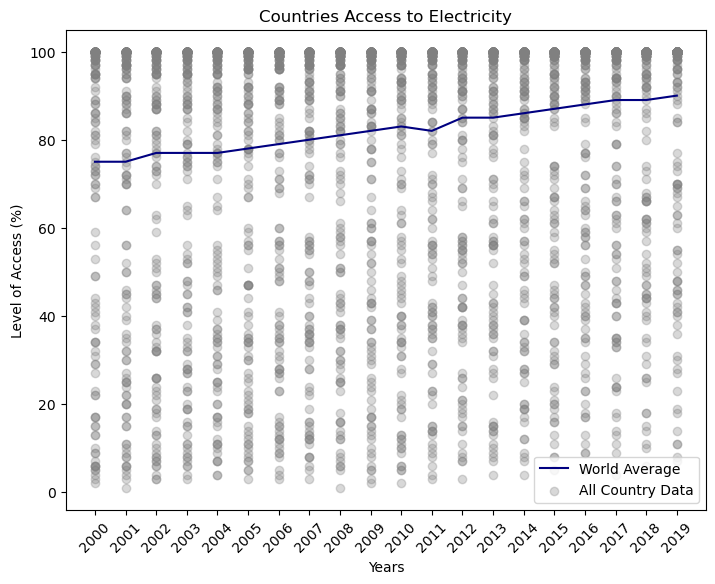

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(df_c.TimePeriod, df_c.Value, c="grey", alpha=0.3, label = "All Country Data") #the only new line added
ax.plot(df_world.TimePeriod, df_world.Value, c="navy", label = "World Average")

plt.xticks(df_world.TimePeriod[::1], rotation=45)
plt.ylabel("Level of Access (%)")
plt.xlabel("Years")
plt.title("Countries Access to Electricity")
plt.legend()
plt.show()

The scatter plot has a lot of data, and so is not very clear to read.  However, creating a colour distinction between rural and urban data points would illustrate if there are any significant divisions between access to electricity.

Run and observe the code below.  It is an example which illustrates how to plot seperate series (in the example, the seperate series being different flower species) using a `for` loop. (credits: Session 2, Physics notebook)

In [8]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


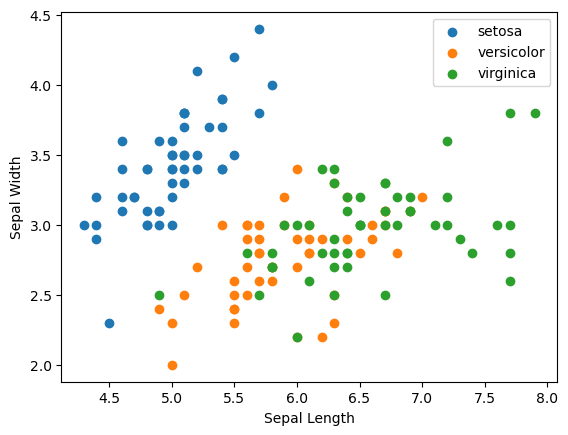

In [9]:
fig, ax = plt.subplots()

for species in iris.species.unique():
    iris_subset = iris.loc[iris.species == species]
    ax.scatter(iris_subset.sepal_length, iris_subset.sepal_width,
               label=species)
ax.legend()
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
plt.show()

Now, we will use this `for` loop method to plot the rural and urban aspects of our data frame as separate series.  Run the cell below to create the data frame `df_c2` which will have all the countries rural and urban data.

In [10]:
df_c2 = sdg[(~(sdg["Location"] == "ALLAREA")) & (sdg.GeoAreaName.isin(countries_list))]
df_c2

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
60,4,Afghanistan,2005,7,RURAL,E
61,4,Afghanistan,2005,74,URBAN,C
63,4,Afghanistan,2006,13,RURAL,E
64,4,Afghanistan,2006,80,URBAN,M
66,4,Afghanistan,2007,20,RURAL,E
...,...,...,...,...,...,...
14410,894,Zambia,2017,14,RURAL,E
14411,894,Zambia,2018,77,URBAN,M
14412,894,Zambia,2018,11,RURAL,E
14414,894,Zambia,2019,14,RURAL,E


Then, replace the previous scatter plot by using the `for` loop to create a two tone scatter chart distinguishing between rural and urban areas.  Still keep the world average in the figure.

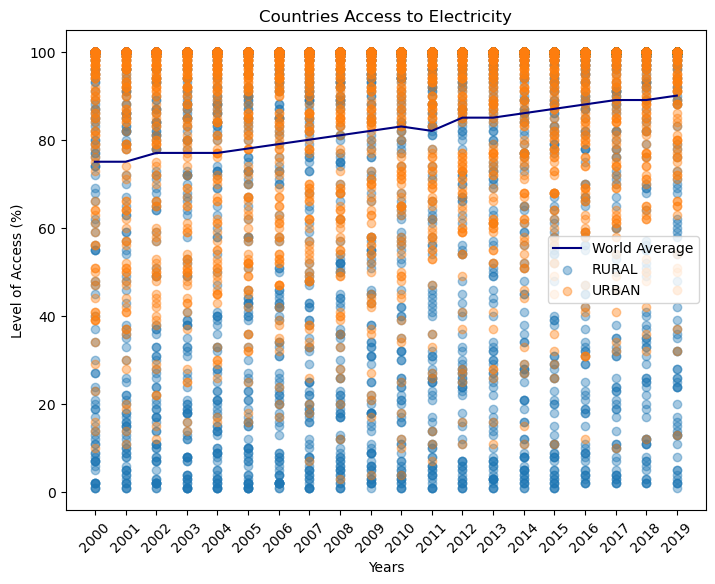

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for Location in df_c2.Location.unique():
    Location_subset = df_c2.loc[df_c2.Location == Location]
    ax.scatter(Location_subset.TimePeriod, Location_subset.Value,
               label=Location, alpha = 0.4)
    
ax.plot(df_world.TimePeriod, df_world.Value, c="navy", label = "World Average")

plt.xticks(df_world.TimePeriod[::1], rotation=45)
plt.ylabel("Level of Access (%)")
plt.xlabel("Years")
plt.title("Countries Access to Electricity")
plt.legend()
plt.show()

A distinct difference can be observed, in which rural regions have a strong tendency of having a lower acccess to electricity.

## Deep Dive: A look into Africa

Research generally points to Africa being the continent that is the most energy deprived.  We will therefore focus the next step of our analysis on this continent.

The data includes a breakdown of 6 african regions - North , South, Middle, East, West and Sub-Saharan Africa.  

The aim is to creat two line plots side by side, one with the urban data of said regions, and the other with rural data.  Line graphs have less flexibility compared to scatter plots in terms of determining colours and series.  It is therefore easiest to split the rural and urban data.

Run the code below to create two data frames - `df_africa_r` which has the regions above rural data, and `df_africa_u` for their urban data.  

In [12]:
#africa regions urban
df_africa_rawu = sdg[sdg.GeoAreaName.str.contains("Africa") & (sdg["Location"] == 'URBAN')] 
df_africa_rawu.GeoAreaName.value_counts() 
df_africa_u = df_africa_rawu[(df_africa_rawu.GeoAreaName != "Northern Africa and Western Asia") & (df_africa_rawu.GeoAreaName != "South Africa") & (df_africa_rawu.GeoAreaName != "Central African Republic")]
df_africa_u.GeoAreaName.value_counts()
#africa regions rural
df_africa_rawr = sdg[sdg.GeoAreaName.str.contains("Africa") & (sdg["Location"] == 'RURAL')] 
df_africa_rawr.GeoAreaName.value_counts()
df_africa_r = df_africa_rawr[(df_africa_rawr.GeoAreaName != "Northern Africa and Western Asia") & (df_africa_rawr.GeoAreaName != "South Africa") & (df_africa_rawr.GeoAreaName != "Central African Republic")]
df_africa_r.GeoAreaName.value_counts()

Western Africa        20
Eastern Africa        20
Northern Africa       20
Middle Africa         20
Southern Africa       20
Sub-Saharan Africa    20
Name: GeoAreaName, dtype: int64

Look at either the `df_africa_r` or `df_africa_r` data frame.  All the regions are listed together under the `GeoAreaName` column.  This makes it tricky to create a line plot.

In [13]:
df_africa_r

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
285,11,Western Africa,2000,16,RURAL,E
290,11,Western Africa,2001,16,RURAL,E
292,11,Western Africa,2002,17,RURAL,E
296,11,Western Africa,2003,23,RURAL,E
299,11,Western Africa,2004,18,RURAL,E
...,...,...,...,...,...,...
4277,202,Sub-Saharan Africa,2015,17,RURAL,E
4278,202,Sub-Saharan Africa,2016,23,RURAL,E
4283,202,Sub-Saharan Africa,2017,21,RURAL,E
4286,202,Sub-Saharan Africa,2018,25,RURAL,E


To help plot each region as a seperate line, we will create something known as a 'pivot table'.  This will reorder the data so that each region will be its own column. 

Referring to the documentation here (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html), create two new dataframes: `pivot_u` and `pivot_r` with the urban and rural data for the regions.



In [14]:
pivot_r = df_africa_r.pivot(index="TimePeriod", columns="GeoAreaName", values="Value")
pivot_u = df_africa_u.pivot(index="TimePeriod", columns="GeoAreaName", values="Value")
pivot_u

GeoAreaName,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Sub-Saharan Africa,Western Africa
TimePeriod,,,,,,
2000,48,29,73,82,58,72
2001,48,37,72,83,60,72
2002,51,41,72,83,62,73
2003,52,42,72,85,63,74
2004,53,43,72,83,63,74
2005,55,47,72,84,65,75
2006,56,47,73,84,66,76
2007,57,55,72,84,68,78
2008,57,52,96,84,67,78


Having reorganised the data, now create two subplots next to each other, one with the African regions urban data, and the other with the rural.  The pivot table will automatically plot each series in a different colour, so that is the only input needed in `.plot()`.

Each subplot has to be formatted seperately, so a trick to apply the same conditions to both is using `plt.setp((ax1,ax2), function = [])`.  It doesn't work in all cases (in this case doesn't seem to work for adding grid lines), but helps speed things up often. 

Look at the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.htmlto), and find the necessary functions to:
* set x axis from 2000 to 2019
* set y axis from 0 to 100
* correct x axis ticks (splicing won't work here unfortunately - I suggest jumps of 2)
* add grid lines
* add a legend to the figure
* set titles for individual plots
* set an overal title for the figure

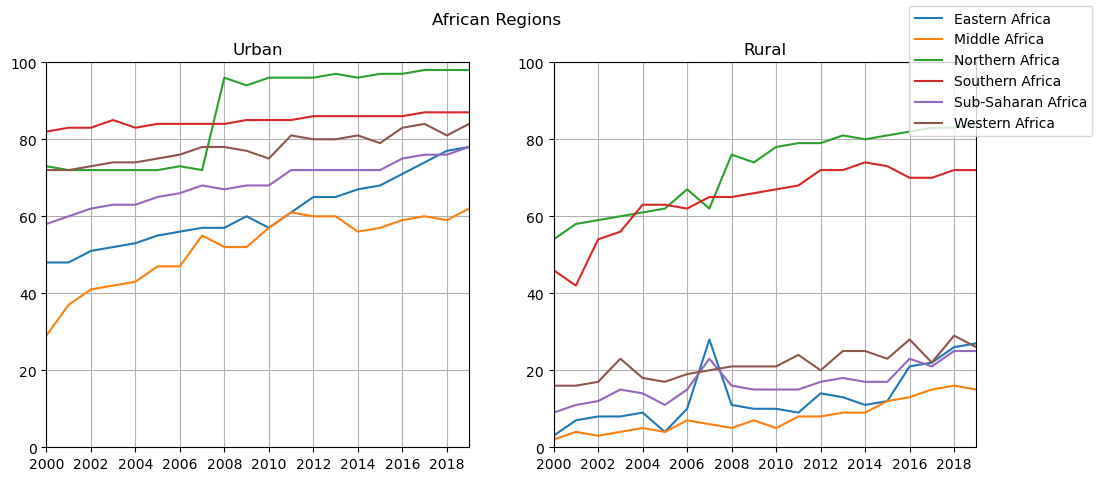

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(pivot_u)
ax2.plot(pivot_r)

plt.setp((ax1,ax2), xlim = [2000,2019])
plt.setp((ax1,ax2), ylim = [0,100])
plt.setp((ax1,ax2), xticks=[2000,2002,2004,2006,2008,
                           2010,2012,2014,2016,2018])

ax1.grid(zorder=0)
ax2.grid(zorder=0)
ax1.title.set_text("Urban")
ax2.title.set_text("Rural")
fig.legend(pivot_u)
fig.suptitle("African Regions")

plt.show()

## Progress or not?

With the aim of the SDGs being to help countries develop, seeing if there is progress in acheiving said goals is an important element of analysis.

We will therefore find the 10 countries that had the lowest access to electricity in 2000, and compare it to the data for them in 2019. This will be done using a more advanced plotting tool called "Seaborn" to create a grouped bar graph.

Run the cells below to create a dataframe of all countries in 2000 (`df_2000`) and 2019 (`df_2019`).

In [16]:
df_2000 = df_c[(df_c["Location"] == "ALLAREA") & (df_c["TimePeriod"] == 2000)]
df_2019 = df_c[(df_c["Location"] == "ALLAREA") & (df_c["TimePeriod"] == 2019)]

Sort the values colomn to find the 10 countries with the lowest access to electricity in 2000.  Call this new data frame `df_2000_10`. 

Hint = use the `.nsmallest(#, colomn)` function to find the bottom 10 countries

In [17]:
df_2000_10 = df_2000.nsmallest(10, "Value")
df_2000_10

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
2639,108,Burundi,2000,2,ALLAREA,M
3275,148,Chad,2000,3,ALLAREA,M
7518,426,Lesotho,2000,4,ALLAREA,C
2348,90,Solomon Islands,2000,5,ALLAREA,M
8063,454,Malawi,2000,5,ALLAREA,C
3042,140,Central African Republic,2000,6,ALLAREA,C
8797,508,Mozambique,2000,6,ALLAREA,M
9787,562,Niger,2000,6,ALLAREA,C
11038,646,Rwanda,2000,6,ALLAREA,C
13403,800,Uganda,2000,7,ALLAREA,M


We will now create a data frame of the same 10 countries, but with their 2019 data.

First, create a list titled `c_10` of the name in the GeoAreaName colomn so we can use it to filter the 2019 data.

In [18]:
c_10 = df_2000_10.GeoAreaName.tolist()
c_10

['Burundi',
 'Chad',
 'Lesotho',
 'Solomon Islands',
 'Malawi',
 'Central African Republic',
 'Mozambique',
 'Niger',
 'Rwanda',
 'Uganda']

Now, using this list as a filter, create a dataframe `df_2019_10` from the dataframe `df_2019` which has all countries data in 2019.

Hint = use the `.isin()` function

In [19]:
df_2019_10 = df_2019[df_2019.GeoAreaName.isin(c_10)]
df_2019_10

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
2402,90,Solomon Islands,2019,70,ALLAREA,M
2684,108,Burundi,2019,11,ALLAREA,M
3094,140,Central African Republic,2019,14,ALLAREA,C
3330,148,Chad,2019,8,ALLAREA,C
7572,426,Lesotho,2019,45,ALLAREA,M
8121,454,Malawi,2019,11,ALLAREA,C
8853,508,Mozambique,2019,30,ALLAREA,M
9843,562,Niger,2019,19,ALLAREA,M
11093,646,Rwanda,2019,38,ALLAREA,M
13461,800,Uganda,2019,41,ALLAREA,C


Seaborn requires that the data is in one single data frame, so run the code below to combine the two data frames (learn more about such dataframe manipulations in session 4).  This will create a final dataframe called `df_10`.

In [20]:
frames = [df_2000_10, df_2019_10]

df_10 = pd.concat(frames)
df_10

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Location,Nature
2639,108,Burundi,2000,2,ALLAREA,M
3275,148,Chad,2000,3,ALLAREA,M
7518,426,Lesotho,2000,4,ALLAREA,C
2348,90,Solomon Islands,2000,5,ALLAREA,M
8063,454,Malawi,2000,5,ALLAREA,C
3042,140,Central African Republic,2000,6,ALLAREA,C
8797,508,Mozambique,2000,6,ALLAREA,M
9787,562,Niger,2000,6,ALLAREA,C
11038,646,Rwanda,2000,6,ALLAREA,C
13403,800,Uganda,2000,7,ALLAREA,M


Now, we will use Seaborn to create a grouped bar graph.  Look at the example below, and then use it as a guide to plot the `df_10` dataframe (credits = https://seaborn.pydata.org/examples/grouped_barplot.html)

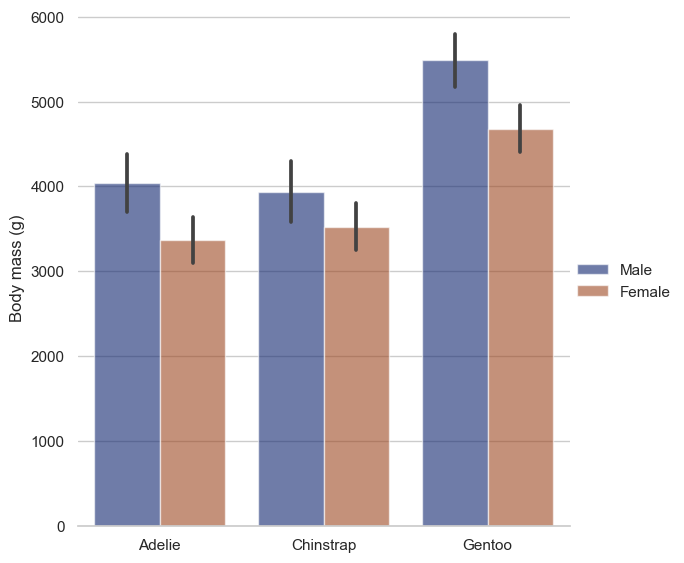

In [21]:
sns.set_theme(style="whitegrid") 

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex", 
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
plt.show()

Now, plot the `d_10` dataframe.  Not all the elements from the example above are necessary, and in addition, rotate the x-axis ticks 90 degrees.

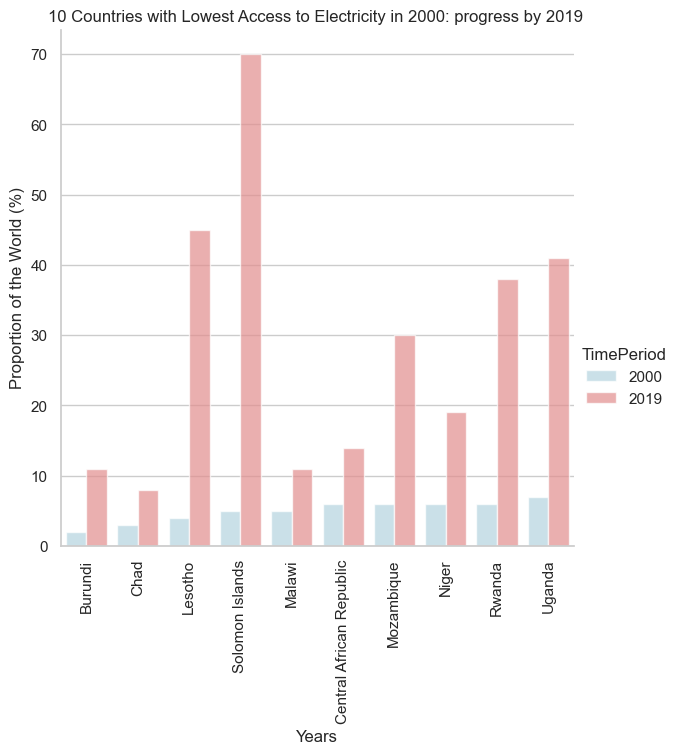

In [22]:
sns.set_theme(style="whitegrid") 

C0 = "lightblue"
C1 = "lightcoral"

b10 = g = sns.catplot(
    data=df_10, kind="bar",
    x="GeoAreaName", y="Value", hue = "TimePeriod", 
    palette= [C0, C1], alpha = 0.7, height=6)

g.set_axis_labels("Years", "Proportion of the World (%)")
g.set(title = '10 Countries with Lowest Access to Electricity in 2000: progress by 2019 ')
plt.xticks(rotation=90)

plt.show()

You can find alot more information on Seaborn plot customisation here = https://s3.amazonaws.com/assets.datacamp.com/production/course_15192/slides/chapter4.pdf